In [35]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

In [3]:
## Importing dataset and cleaning it

df = pd.read_csv("headlines_data.csv")
df = df[:50000]
df = df["headline_text"]
headlines = df.tolist()

In [11]:
## Creating a bigram model for the headlines

b = {}

for headline in headlines:
    chs = ["<S>"] + list(headline) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [21]:
## Sorting the bigrams according to the occurance

# sorted(b.items(), key= lambda kv: -kv[1])

In [51]:
chars = sorted(list(set("".join(headlines))))
s_to_i = {s: i for i, s in enumerate(chars)}
s_to_i["<B>"] = 38

In [52]:
N = torch.zeros((39, 39), dtype=torch.int32)

In [53]:
for headline in headlines:
    chs = ["<B>"] + list(headline) + ["<B>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        N[ix1, ix2] += 1

In [54]:
i_to_s = {i: s for s, i in s_to_i.items()}

In [55]:
N

tensor([[    0,     0,    32,  ...,   826,   254,     0],
        [    0,     0,     0,  ...,     0,     0,     0],
        [  620,     1,   820,  ...,     1,     0,    76],
        ...,
        [11809,     0,     0,  ...,     7,    10,  2887],
        [  306,     0,     0,  ...,    22,   111,    49],
        [    0,     0,     0,  ...,   127,   106,     0]], dtype=torch.int32)

(-0.5, 38.5, 38.5, -0.5)

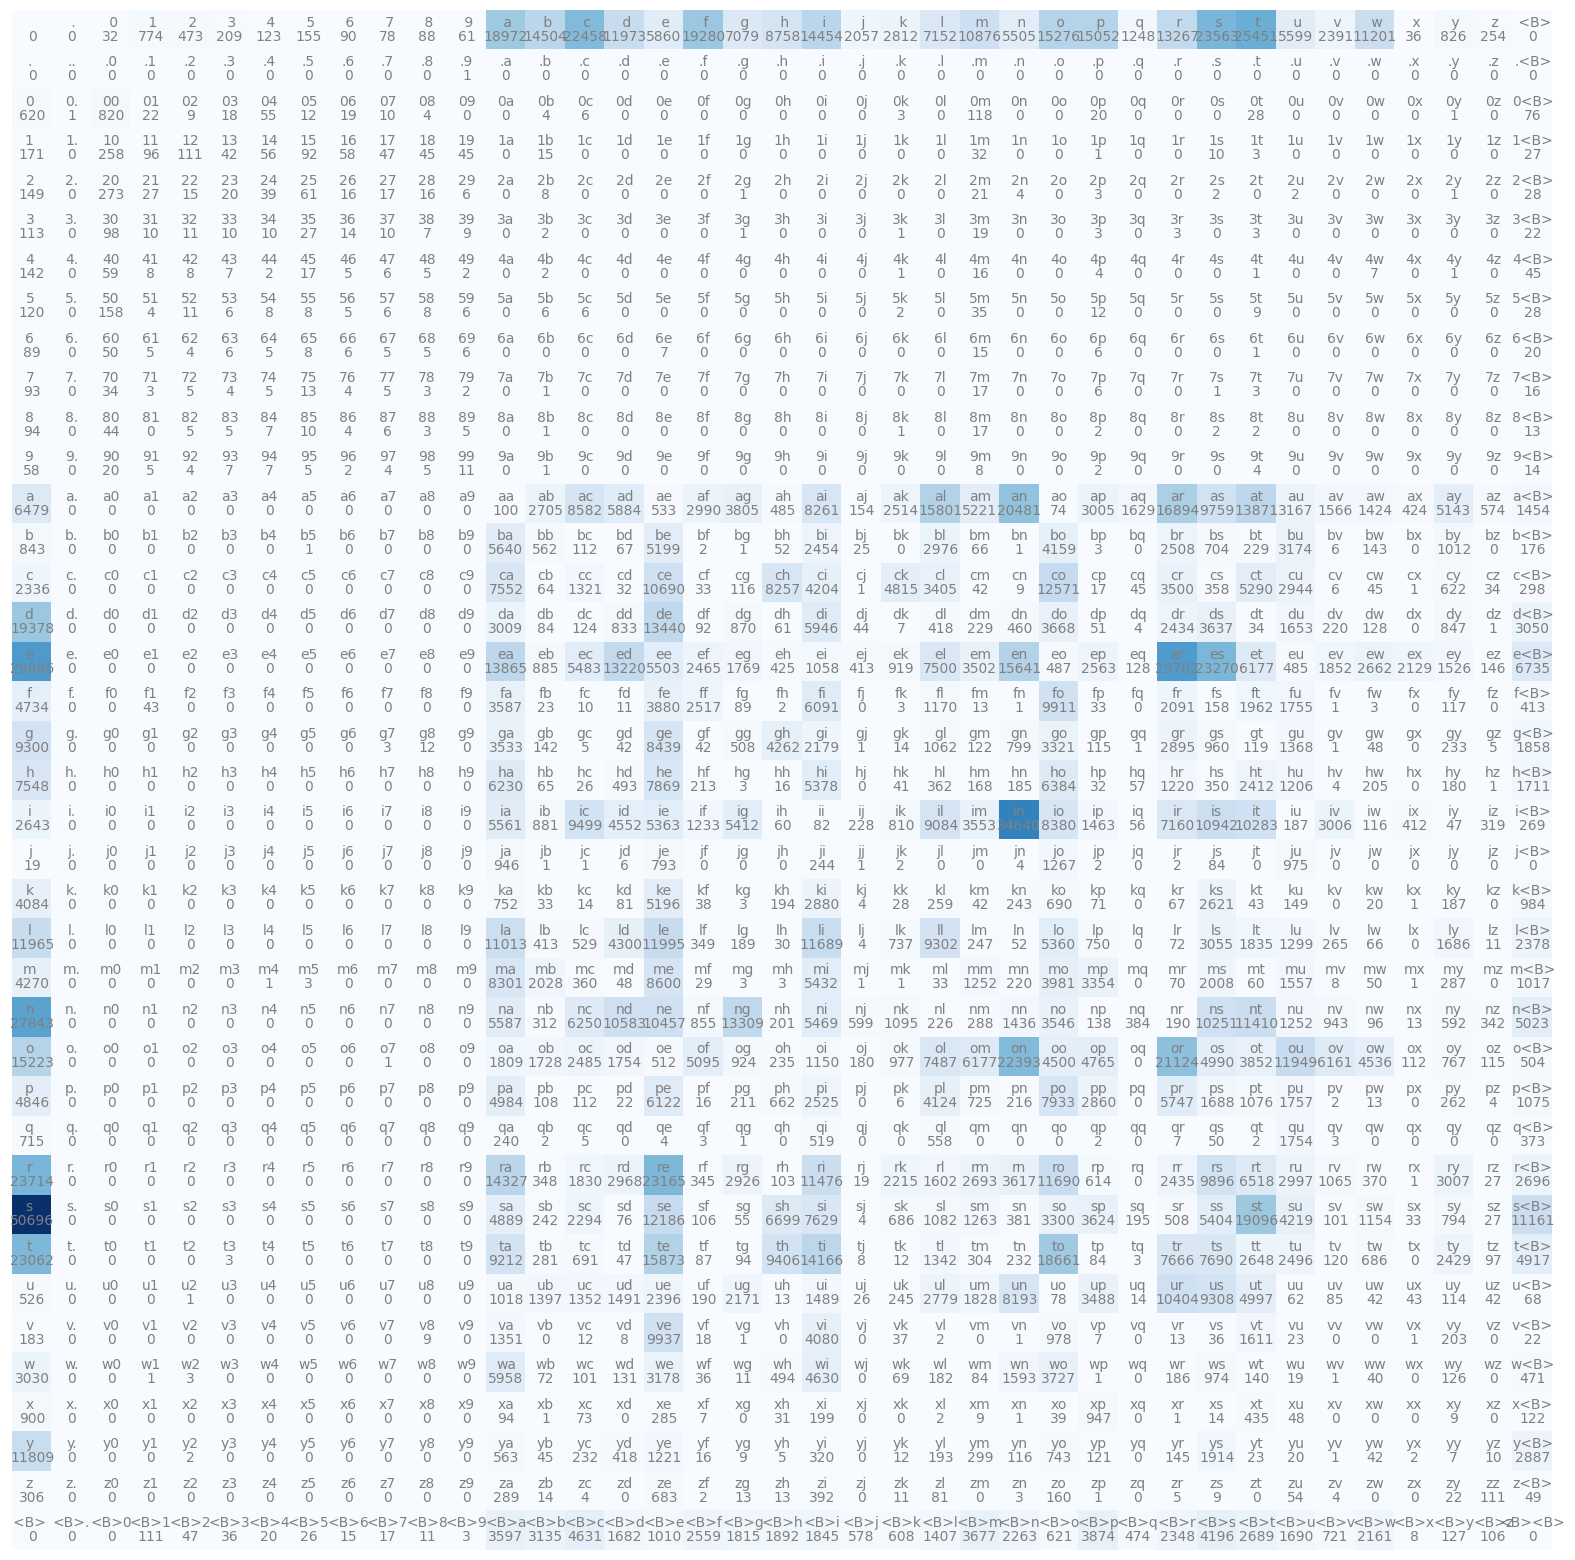

In [56]:
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap="Blues")

for i in range(39):
    for j in range(39):
        ch_str = i_to_s[i] + i_to_s[j]
        plt.text(j, i, ch_str, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis("off")

In [64]:
## Sampling one character using multinomial distribution

g = torch.Generator().manual_seed(1111)

p = N[0].float()
p = p/p.sum()
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
i_to_s[ix.item()]       ## Pretty funny cause Karpathy got the same character as well, when the data and seed were different.

'm'

In [81]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [82]:
## Generating a complete sentence using multinomial distribution

g = torch.Generator().manual_seed(1111)

for i in range(10):
    out = []
    ix = 0
    while True:
        # p = N[ix].float()
        # p = p/p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        
        if ix == 38:
            break;

        out.append(i_to_s[ix])

    print("".join(out))

madorirndedumedr qlerowo ler hun ce hertessigagaks catgin fiprias bult mie lins thamp painintor coplan acksen bereancen tereallm havakes h hoco linc hasth ic ry r ves ten
osel o ht brar h niorn hsech bovedr
on hofg segen
ffffed woty h onay
funuts monge f
t
es
wway m t lone iniupegorer s fent f h ey
allcay blalcec
rsint qus fe


In [76]:
P = N.float()
P.sum()

tensor(2019342.)